<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana8/ECalor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,1,6)
x

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [3]:
T = np.zeros_like(x)
# Condiciones de frontera
T[0] = 10
T[-1] = 100
T

array([ 10.,   0.,   0.,   0.,   0., 100.])

In [4]:
def GaussSeidel(A,b,x0, itmax = 10000, tolerancia = 1e-10):

  x = x0.copy()

  for it in range(itmax):

    # Hacemos una copia del vector x
    x_new = np.copy(x)

    for i in range(A.shape[0]):

      # Contabilizamos la suma del iterador
      Suma = 0.
      for j in range(A.shape[1]):
        if i != j:
          Suma += A[i,j]*x_new[j]
          # La diferencia radica en que ahora la suma es
          # calcula usando x_new recien actualizado
        x_new[i] = (b[i] - Suma)/A[i,i]

    #print(x_new)

    # Criterio de convergencia
    if np.linalg.norm( np.dot(A,x_new)-b) < tolerancia:
      break

    x = np.copy(x_new)

  print(it)

  return x, it

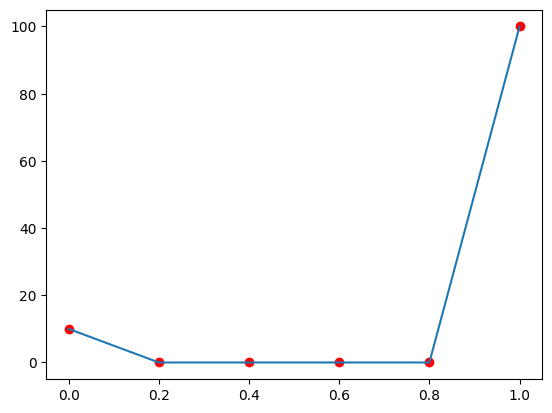

In [5]:
plt.plot(x,T)
plt.scatter(x,T,color='r')